<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Week2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

前置きが長いため割愛。diverの本文を確認する。

___
### 問題1　ダーツのマトを選ぶ

In [26]:
import numpy as np

num_darts = 6
choice_of_darts = np.random.choice(range(1, num_darts+1))
choice_of_darts

2

___
### 問題2　ダーツを投げる→刺さった場所を記録

In [27]:
mean = [choice_of_darts, 0]
cov = [[0.01, 0], [0, 0.01]]
x_y = np.random.multivariate_normal(mean, cov)
coordinates = [x_y[0], x_y[1]]
coordinates

[1.9100432620428693, 0.1249039465436031]

共分散行列の確認

$
        \left[\begin{array}{c}
            S_x^2 \quad S_{xy} \\
            S_{xy} \quad S_y^2 \\
        \end{array}\right]
$

$S_x^2$...分散。データの散らばり具合を数値化したもの。この数値の平方根が標準偏差$S_x$となる。（$S_y^2$も一緒）

$S_{xy}$...共分散。2種類（xとy）のデータの相関関係を数値化したもの。この値が＋なら片方の値が増加するともう片方も増加する、**正の相関**。<br>➖なら片方が増加するともう片方は減少する、負の相関。

___
### 問題3　ダーツを1000回投げる→マトの番号と座標を辞書にする
マトの番号をkey、座標のリストをvalueとする。<br>
繰り返し処理のなかで辞書に格納する際、同じkeyがあったら値を更新してしまうため、更新されないよう、valueをリストオブジェクトにしてappendで追加する。

In [36]:
# 辞書作成時、valueのオブジェクトが指定できるdefauldictメソッドをimport
from collections import defaultdict

num_darts = 6
result = defaultdict(list)  # valueのオブジェクトがリストの辞書を作成

for _ in range(1000):
    choice_of_darts = np.random.choice(range(1, num_darts+1))
    mean = [choice_of_darts, 0]
    cov = [[0.01, 0], [0, 0.01]]
    x_y = np.random.multivariate_normal(mean, cov)
    coordinates = [x_y[0], x_y[1]]
    result[choice_of_darts].append(coordinates) # valueがリストなのでappendが使える！

# 確認
print('マトの数：', len(result))
print('6番のマトに刺さったダーツ：', result[6])

マトの数： 6
6番のマトに刺さったダーツ： [[5.99191366336221, 0.17055311195451117], [6.020432753153407, 0.16783656774571898], [5.973651363567359, 0.19867267853868498], [6.0131763017504545, 0.09785748493993404], [6.113943168948267, -0.0022949483033255645], [6.000204567813322, 0.14169189109597782], [6.076880976436832, -0.04842396811019652], [6.008513478163425, 0.1766885922122554], [5.925025174160588, -0.15509826891990208], [5.878035916456043, 0.09483868395699975], [6.184036662761103, 0.044170823103633065], [6.2273799134041585, -0.016026114570138115], [5.859697303812514, 0.1058424425343248], [5.907661467904069, -0.08120390909009884], [5.968281722374714, -0.09579804397572744], [6.205208757033495, -0.040787756481774455], [5.933657996453484, 0.022135120038936213], [6.0169801572348804, 0.04209919730212164], [6.076550296283845, 0.03178011051610315], [5.961953757822554, -0.012070523548441186], [5.924928501244725, -0.00717218535585568], [6.141026865105873, 0.036443697781516245], [5.9856423802505505, -0.00440377611

___
### 問題4　描画する
辞書からキーごとに値を取り出し、マトごとに刺さった場所を描画する。

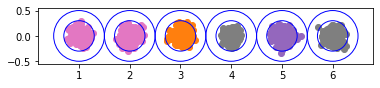

In [32]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Figureオブジェクトとそれに属する一つのAxesオブジェクトを同時に生成
fig, ax = plt.subplots()

# ダーツの色をマトごとに振り分けたいので、axes.prop_cycleのカラーサイクルリストを使う
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for key, list_value in result.items():
    # 円を定義し、描画する
    outer_circle = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
    inner_circle = patches.Circle(xy=(key, 0), radius=0.3, ec='b', fill=False)
    ax.add_patch(outer_circle)
    ax.add_patch(inner_circle)

    color = random.choice(colors)   # 10色格納されてるcolorsからランダムにチョイス
    # 乱数をプロッド
    for value in list_value:
        plt.scatter(value[0], value[1], c=color)

plt.axis('scaled')
ax.set_aspect('equal')

___
### 問題5　関数化する
第一引数に投げる数、第二引数にマトの数を受け取り、ダーツの描画する関数を作る。

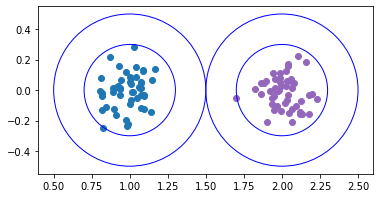

In [30]:
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from collections import defaultdict
import random
%matplotlib inline

def Hitting_the_matte_on_the_dart(count, darts):
    result = defaultdict(list)  # valueのオブジェクトがリストの辞書を作成

    for _ in range(count):
        num_darts = darts
        choice_of_darts = np.random.choice(range(1, num_darts+1))
        mean = [choice_of_darts, 0]
        cov = [[0.01, 0], [0, 0.01]]
        x_y = np.random.multivariate_normal(mean, cov)
        coordinates = [x_y[0], x_y[1]]
        result[choice_of_darts].append(coordinates)

    fig, ax = plt.subplots()
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for key, list_value in result.items():
        # 円を定義し、描画する
        outer_circle = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
        inner_circle = patches.Circle(xy=(key, 0), radius=0.3, ec='b', fill=False)
        ax.add_patch(outer_circle)
        ax.add_patch(inner_circle)

        color = random.choice(colors)
        for value in list_value:
            plt.scatter(value[0], value[1], c=color)

    plt.axis('scaled')
    ax.set_aspect('equal')

Hitting_the_matte_on_the_dart(100, 2)

___
### 感想
描画に苦戦した。正直、ネットのコピペの部分が多く、理解しないまま実装している部分が多くある。特に、figとaxの概念がわからない。また、マトの数が増えると描画される図が小さくなってしまう現象があり、ネットで調べても解決できなかった。